### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import librosa
import os, fnmatch
import matplotlib.pyplot as plt
import seaborn as sns
import json

import tensorflow as tf
from tensorflow import keras
### Use GPU if available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Reading the audio file

In [2]:
n_mfcc = 30

In [3]:
data = pd.read_csv("Features_clipped.csv")

In [4]:
data['type'].value_counts()

normal        563
murmur        265
artifact      120
extrastole     64
extrahls       37
Name: type, dtype: int64

### Modelling on Data

In [5]:
X = data.iloc[:, 0:n_mfcc+4]
y = data['type']

In [6]:
y_encoder = LabelEncoder().fit(y)
y = y_encoder.transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31, stratify=y)
print("Train size:",len(X_train), "\nTest size:", len(X_test))

Train size: 786 
Test size: 263


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Classifier

In [9]:
forest = RandomForestClassifier(random_state=31, class_weight='balanced', oob_score=True)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=31)

In [10]:
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9809885931558935

In [11]:
forest.oob_score_

0.9631043256997456

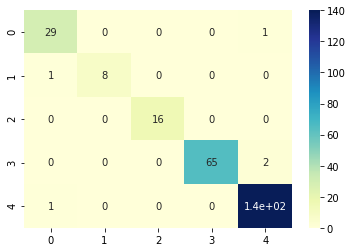

In [12]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")
plt.savefig("RandomForest.jpg")

In [13]:
y_pred = forest.predict(X_test)
print("\nClassification report on test data using Random Forest: \n", classification_report(y_test, y_pred))


Classification report on test data using Random Forest: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        16
           3       1.00      0.97      0.98        67
           4       0.98      0.99      0.99       141

    accuracy                           0.98       263
   macro avg       0.98      0.96      0.97       263
weighted avg       0.98      0.98      0.98       263



### Gradient Boosting Algorithm

In [14]:
gradient = GradientBoostingClassifier(random_state=31)
gradient.fit(X_train, y_train)

GradientBoostingClassifier(random_state=31)

In [15]:
y_pred = gradient.predict(X_test)
accuracy_score(y_test, y_pred)

0.9847908745247148

In [16]:
y_pred = gradient.predict(X_test)
print("\nClassification report on test data using Gradient Boosting: \n", classification_report(y_test, y_pred))


Classification report on test data using Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.89      0.94         9
           2       1.00      0.94      0.97        16
           3       0.97      0.97      0.97        67
           4       0.99      1.00      1.00       141

    accuracy                           0.98       263
   macro avg       0.99      0.96      0.97       263
weighted avg       0.98      0.98      0.98       263



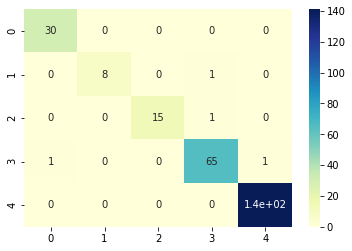

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("GradientBoosting.jpg")

### Support Vector Classifier

In [18]:
svc = SVC(random_state=9, class_weight='balanced')
svc.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=9)

In [19]:
y_pred = svc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8631178707224335

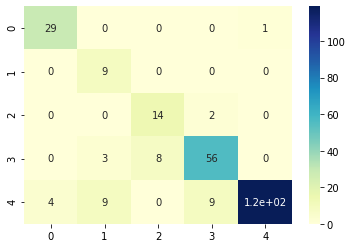

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("SVC.jpg")

In [21]:
y_pred = svc.predict(X_test_scaled)
print("\nClassification report on test data using Support Vector Classifier: \n", classification_report(y_test, y_pred))


Classification report on test data using Support Vector Classifier: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.43      1.00      0.60         9
           2       0.64      0.88      0.74        16
           3       0.84      0.84      0.84        67
           4       0.99      0.84      0.91       141

    accuracy                           0.86       263
   macro avg       0.75      0.90      0.80       263
weighted avg       0.90      0.86      0.87       263



### Gaussian Naive Bayes

In [22]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [23]:
y_pred = gaussian_nb.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.688212927756654

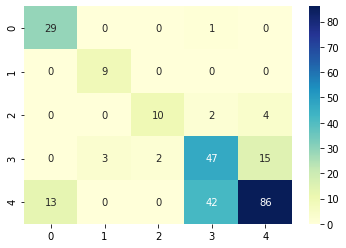

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("NaiveBayes.jpg")

In [25]:
y_pred = gaussian_nb.predict(X_test_scaled)
print("\nClassification report on test data using Gaussian Naive Bayes: \n", classification_report(y_test, y_pred))


Classification report on test data using Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.69      0.97      0.81        30
           1       0.75      1.00      0.86         9
           2       0.83      0.62      0.71        16
           3       0.51      0.70      0.59        67
           4       0.82      0.61      0.70       141

    accuracy                           0.69       263
   macro avg       0.72      0.78      0.73       263
weighted avg       0.72      0.69      0.69       263



### Multi Layer Perceptron

In [26]:
mlp=MLPClassifier(random_state=9)
mlp.fit(X_train_scaled,y_train)

/home/durgesh/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=9)

In [27]:
y_pred=mlp.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9505703422053232

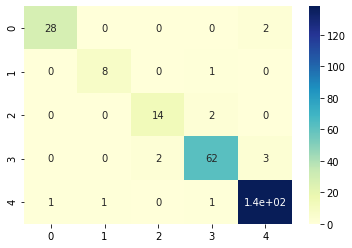

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")
plt.savefig("MLPClassifier.jpg")

In [29]:
y_pred = mlp.predict(X_test_scaled)
print("\nClassification report on test data using Multi Layer Perceptron: \n", classification_report(y_test, y_pred))


Classification report on test data using Multi Layer Perceptron: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.89      0.89      0.89         9
           2       0.88      0.88      0.88        16
           3       0.94      0.93      0.93        67
           4       0.97      0.98      0.97       141

    accuracy                           0.95       263
   macro avg       0.93      0.92      0.92       263
weighted avg       0.95      0.95      0.95       263



### Stacking Classifier

In [30]:
base_estimators = [
    ("gba",gradient),
    ("svc",svc),
    ("naive_bayes",gaussian_nb)
]

logistic = LogisticRegression(class_weight='balanced')

stacking = StackingClassifier(estimators = base_estimators,final_estimator= logistic, cv=5, passthrough=True, n_jobs=4)
stacking.fit(X_train_scaled, y_train)

/home/durgesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('gba',
                                GradientBoostingClassifier(random_state=31)),
                               ('svc',
                                SVC(class_weight='balanced', random_state=9)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=4, passthrough=True)

In [31]:
y_pred = stacking.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9885931558935361

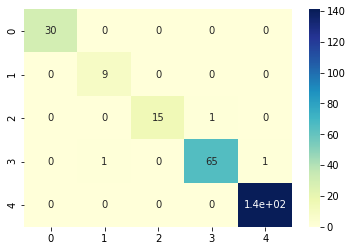

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("StackingClassifier.jpg")

In [33]:
y_pred = stacking.predict(X_test_scaled)
print("\nClassification report on test data using Stacking Classifier: \n", classification_report(y_test, y_pred))


Classification report on test data using Stacking Classifier: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.90      1.00      0.95         9
           2       1.00      0.94      0.97        16
           3       0.98      0.97      0.98        67
           4       0.99      1.00      1.00       141

    accuracy                           0.99       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.99      0.99      0.99       263



### Preparing for Auto Encoders

In [53]:
with open("MFCC_clipped.json", 'r') as fp:
    mfcc = json.load(fp)

In [54]:
X = np.array(mfcc['mfcc'])
y = np.array(mfcc['type'])

y = y_encoder.transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size= 0.2, stratify= y_train)

In [56]:
obs = list(pd.DataFrame(y_train).value_counts().sort_index())

weights = []
for i in range(0, 5):
    weights.append(sum(obs)/obs[i])

class_weight = {
    0 : weights[0],
    1 : weights[1],
    2 : weights[2],
    3 : weights[3],
    4 : weights[4]
}

### Building Auto Encoder

In [57]:
class Autoencoder:
    
    def __init__(self, input_shape, conv_filters, conv_kernels, conv_strides, latent_space_dim):
        self.input_shape = input_shape
        self.conv_filters = conv_filters
        self.conv_kernels = conv_kernels
        self.conv_strides = conv_strides
        self.latent_space_dim = latent_space_dim
        
        self.encoder = None
        self.decoder = None
        self.model = None
        
        self._num_conv_layers = len(conv_filters)
        self._shape_before_bottleneck = None
        self._model_input = None
        
        self._build()
        
    
    def summary(self):
        self.encoder.summary()
        self.decoder.summary()
        self.model.summary()
        
    
    def compile(self, learning_rate=0.0001):
        optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
        mse_loss = keras.losses.MeanSquaredError()
        self.model.compile(optimizer=optimiser, loss = mse_loss)
        
    
    def train(self, x_train, batch_size, num_epochs):
        self.model.fit(x_train, x_train, batch_size=batch_size, epochs= num_epochs, shuffle=True)
        
    
    def _build(self):
        self._build_encoder()
        self._build_decoder()
        self._build_autoencoder()
        
    
    def _build_autoencoder(self):
        model_input = self._model_input
        model_output = self.decoder(self.encoder(model_input))
        self.model = keras.Model(model_input, model_output, name="autoencoder")
        
    
    def _build_decoder(self):
        decoder_input = self._add_decoder_input()
        dense_layer = self._add_dense_layer(decoder_input)
        reshape_layer = self._add_reshape_layer(dense_layer)
        conv_transpose_layers = self._add_conv_transpose_layers(reshape_layer)
        decoder_output = self._add_decoder_output(conv_transpose_layers)
        self.decoder = keras.Model(decoder_input, decoder_output, name='decoder')
        
    
    def _add_decoder_input(self):
        return keras.layers.Input(shape=self.latent_space_dim, name="decoder_input")
    
    
    def _add_dense_layer(self, decoder_input):
        num_neurons = np.prod(self._shape_before_bottleneck)
        dense_layer = keras.layers.Dense(num_neurons, name="decoder_dense")(decoder_input)
        return dense_layer
    
    
    def _add_reshape_layer(self, dense_layer):
        return keras.layers.Reshape(self._shape_before_bottleneck)(dense_layer)
    
    
    def _add_conv_transpose_layers(self, x):
        ## loop through all the conv layers in reverse order and stop at the first layer
        for layer_index in reversed(range(1, self._num_conv_layers)):
            x = self._add_conv_transpose_layer(layer_index, x)
        return x
    
    
    def _add_conv_transpose_layer(self, layer_index, x):
        layer_num = self._num_conv_layers - layer_index
        conv_transpose_layer = keras.layers.Conv2DTranspose(filters = self.conv_filters[layer_index],
                                                           kernel_size = self.conv_kernels[layer_index],
                                                           strides = self.conv_strides[layer_index],
                                                           padding="same",
                                                           name=f"decoder_conv_transpose_layer_{layer_num}")
        x = conv_transpose_layer(x)
        x = keras.layers.ReLU(name=f"decoder_relu_{layer_num}")(x)
        x = keras.layers.BatchNormalization(name=f"decoder_bn_{layer_num}")(x)
        return x
    
    
    def _add_decoder_output(self, x):
        conv_transpose_layer = keras.layers.Conv2DTranspose(
        filters = 1,
        kernel_size = self.conv_kernels[0],
        strides = self.conv_strides[0],
        padding="same",
        name=f"decoder_conv_transpose_layer_{self._num_conv_layers}")
        x = conv_transpose_layer(x)
        output_layer = keras.layers.Activation("sigmoid", name="sigmoid_layer")(x)
        return output_layer
    
    
    def _build_encoder(self):
        encoder_input = self._add_encoder_input()
        conv_layers = self._add_conv_layers(encoder_input)
        bottleneck = self._add_bottleneck(conv_layers)
        self._model_input = encoder_input
        self.encoder = keras.Model(encoder_input, bottleneck, name="encoder")
        
        
    def _add_encoder_input(self):
        return keras.layers.Input(shape=self.input_shape, name="encoder_input")
    
    
    def _add_conv_layers(self, encoder_input):
        x = encoder_input
        for layer_index in range(self._num_conv_layers):
            x = self._add_conv_layer(layer_index, x)
        return x
    
    
    def _add_conv_layer(self, layer_index, x):
        layer_number = layer_index + 1
        conv_layer = keras.layers.Conv2D(filters=self.conv_filters[layer_index],
                                        kernel_size=self.conv_kernels[layer_index],
                                        strides=self.conv_strides[layer_index],
                                        padding="same",
                                        name=f"encoder_conv_layer_{layer_number}")
        x = conv_layer(x)
        x = keras.layers.ReLU(name=f"encoder_relu_{layer_number}")(x)
        x = keras.layers.BatchNormalization(name=f"encoder_bn_{layer_number}")(x)
        return x
    
    
    def _add_bottleneck(self, x):
        self._shape_before_bottleneck = keras.backend.int_shape(x)[1:]
        x = keras.layers.Flatten()(x)
        x = keras.layers.Dense(self.latent_space_dim, name="encoder_output")(x)
        return x


In [58]:
autoencoder = Autoencoder(input_shape=(130,30,1),
                         conv_filters=(32, 64, 64, 64, 64),
                         conv_kernels=(3,5,5,5, 5),
                         conv_strides=(1,2,1, 1, 1),
                         latent_space_dim=60)

In [59]:
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 130, 30, 1)]      0         
_________________________________________________________________
encoder_conv_layer_1 (Conv2D (None, 130, 30, 32)       320       
_________________________________________________________________
encoder_relu_1 (ReLU)        (None, 130, 30, 32)       0         
_________________________________________________________________
encoder_bn_1 (BatchNormaliza (None, 130, 30, 32)       128       
_________________________________________________________________
encoder_conv_layer_2 (Conv2D (None, 65, 15, 64)        51264     
_________________________________________________________________
encoder_relu_2 (ReLU)        (None, 65, 15, 64)        0         
_________________________________________________________________
encoder_bn_2 (BatchNormaliza (None, 65, 15, 64)        256 

In [60]:
autoencoder.compile(0.01)

In [61]:
X_train_cnn = X_train[..., np.newaxis]
X_validate_cnn = X_validate[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

In [62]:
autoencoder.train(X_train_cnn, 32, 100)

Epoch 1/100
21/21 [==============================] - 2s 76ms/step - loss: 8481.1387
Epoch 2/100
21/21 [==============================] - 2s 76ms/step - loss: 8478.8477
Epoch 3/100
21/21 [==============================] - 2s 75ms/step - loss: 8478.8467
Epoch 4/100
21/21 [==============================] - 2s 75ms/step - loss: 8478.8467
Epoch 5/100
21/21 [==============================] - 2s 75ms/step - loss: 8478.8467
Epoch 6/100
21/21 [==============================] - 2s 77ms/step - loss: 8478.8369
Epoch 7/100
21/21 [==============================] - 2s 76ms/step - loss: 8478.8193
Epoch 8/100
21/21 [==============================] - 2s 76ms/step - loss: 8478.7656
Epoch 9/100
21/21 [==============================] - 2s 77ms/step - loss: 8478.6992
Epoch 10/100
21/21 [==============================] - 2s 76ms/step - loss: 8478.6582
Epoch 11/100
21/21 [==============================] - 2s 75ms/step - loss: 8478.6475
Epoch 12/100
21/21 [==============================] - 2s 76ms/step - loss:

KeyboardInterrupt: 

In [44]:
mfcc_features = autoencoder.encoder.predict(X)

In [45]:
mfcc_feature_cols = []
for i in range(60):
    mfcc_feature_cols.append("Latent_space_"+str(i))


latent_space = pd.DataFrame(mfcc_features, columns=mfcc_feature_cols)

### Working with Latent Space

In [46]:
X = pd.concat([latent_space, data.iloc[:,30:34]], axis=1)
y = data['type']

y = y_encoder.transform(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31, stratify=y)
print("Train size:",len(X_train), "\nTest size:", len(X_test))

Train size: 839 
Test size: 210


In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Stacking Classifier

In [49]:
base_estimators = [
    ("rf", forest),
    ("gba",gradient),
    ("svc",svc),
    ("naive_bayes",gaussian_nb)
]

logistic = LogisticRegression(class_weight='balanced')

stacking = StackingClassifier(estimators = base_estimators,final_estimator= logistic, cv=5, passthrough=True, n_jobs=4)
stacking.fit(X_train_scaled, y_train)

/home/durgesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       oob_score=True,
                                                       random_state=31)),
                               ('gba',
                                GradientBoostingClassifier(random_state=31)),
                               ('svc',
                                SVC(class_weight='balanced', random_state=9)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=4, passthrough=True)

In [50]:
y_pred = stacking.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5666666666666667

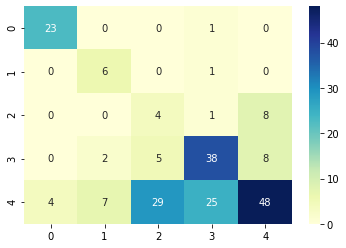

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.savefig("StackingClassifier_with_AE.jpg")

In [52]:
y_pred = stacking.predict(X_test_scaled)
print("\nClassification report on test data using Stacking Classifier with AE: \n", classification_report(y_test, y_pred))


Classification report on test data using Stacking Classifier with AE: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.40      0.86      0.55         7
           2       0.11      0.31      0.16        13
           3       0.58      0.72      0.64        53
           4       0.75      0.42      0.54       113

    accuracy                           0.57       210
   macro avg       0.54      0.65      0.56       210
weighted avg       0.67      0.57      0.58       210

